In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

import contextily as ctx

In [2]:
states = gpd.read_file('tl_2022_us_state/tl_2022_us_state.shp')
states.columns = states.columns.str.lower()
states.head()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


<AxesSubplot:>

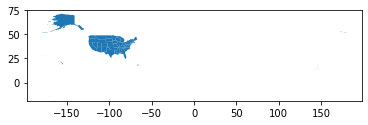

In [3]:
states.plot()

In [4]:
communities = gpd.read_file('https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4')
communities.head()

,name,population,country,geoname-id,geometry
0,Udomlya,32373,RU,452949,POINT (34.99250 57.87944)
1,Valmiera,26963,LV,453754,POINT (25.42751 57.54108)
2,Ventspils,42644,LV,454310,POINT (21.57288 57.38988)
3,Vec-Liepāja,85260,LV,454432,POINT (21.01667 56.53333)
4,Tukums,18348,LV,454768,POINT (23.15528 56.96694)


<AxesSubplot:>

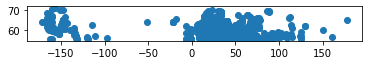

In [5]:
communities.plot()

In [6]:
print(communities.crs)
print(states.crs)

epsg:4326
epsg:4269


<AxesSubplot:>

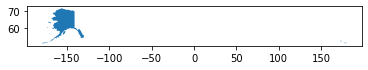

In [7]:
alaska = states[states.name =='Alaska']
alaska.plot()

<AxesSubplot:>

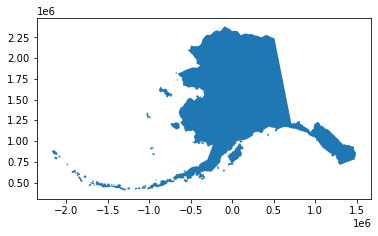

In [8]:
# add info about this CRS
alaska = alaska.to_crs('epsg:3338')
alaska.plot()

In [9]:
alaska.crs.is_projected

True

<AxesSubplot:>

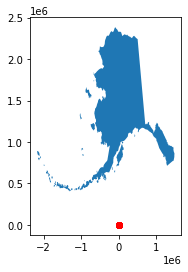

In [10]:
# Trouble: not in the same CRS
fig, ax = plt.subplots()

alaska.plot(ax=ax)
communities.plot(ax=ax, color='red')

In [11]:
communities = communities.to_crs(alaska.crs)
communities.crs == alaska.crs

True

<AxesSubplot:>

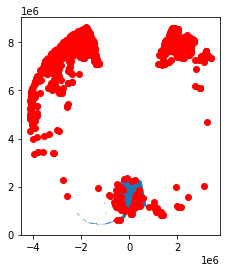

In [12]:
# Trouble: not in the same CRS
# this is cool! but now we are seeing all Arctic comms
fig, ax = plt.subplots()

alaska.plot(ax=ax)
communities.plot(ax=ax, color='red')

In [13]:
ak_comms = gpd.clip(communities,alaska)
ak_comms

,name,population,country,geoname-id,geometry
1298,King Cove,938,US,5866308,POINT (-530099.545 594133.440)
1326,Sand Point,976,US,5873349,POINT (-411560.244 611742.064)
1261,Metlakatla,1405,US,5555695,POINT (1403355.130 807737.504)
1267,Craig,1201,US,5845544,POINT (1296182.920 812340.936)
1260,Klawock,755,US,5554566,POINT (1296722.624 821399.692)
...,...,...,...,...,...
1320,Point Hope,674,US,5871791,POINT (-526210.963 2093579.704)
1315,Nuiqsut,3402,US,5870441,POINT (116301.889 2251323.295)
1321,Prudhoe Bay,2174,US,5872126,POINT (217275.285 2262083.249)
1342,Wainwright,556,US,5877543,POINT (-227854.290 2304942.804)


<AxesSubplot:>

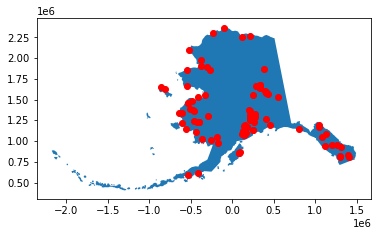

In [14]:
# Trouble: not in the same CRS
# this is cool! but now we are seeing all Arctic comms
fig, ax = plt.subplots()

alaska.plot(ax=ax)
ak_comms.plot(ax=ax, color='red')

/Users/galaz-garcia/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


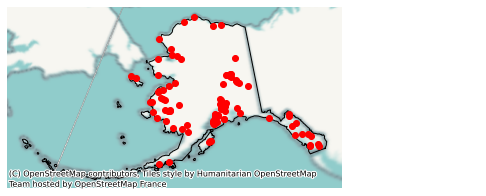

In [25]:
# Trouble: not in the same CRS
# this is cool! but now we are seeing all Arctic comms
fig, ax = plt.subplots()
# remove the axis box around the map
ax.axis('off')

alaska.plot(ax=ax, color='none', edgecolor='black')
ak_comms.plot(ax=ax, color='red')
ctx.add_basemap(ax, 
                crs=alaska.crs.to_string(),
                 source= ctx.providers.Esri.WorldTerrain)

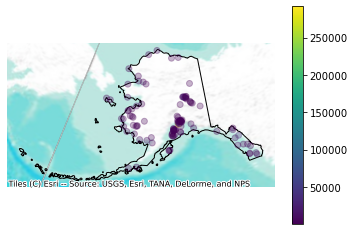

In [27]:
# Trouble: not in the same CRS
# this is cool! but now we are seeing all Arctic comms
fig, ax = plt.subplots()
# remove the axis box around the map
ax.axis('off')

alaska.plot(ax=ax, 
            color='none', 
            edgecolor='black')
ak_comms.plot(ax=ax,  
              #column='population', 
              markersize=4,
              color='pink'
              legend=True)
ctx.add_basemap(ax, 
                crs=alaska.crs.to_string(),
                 source= ctx.providers.Esri.WorldTerrain)